In [2]:
import numpy as np
from numpy.fft import rfft, rfftfreq
import matplotlib.pyplot as plt
plt.style.use('seaborn')

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.backend import clear_session

C:\Users\Admin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Admin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Admin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Admin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [6]:
signals_close = []
signals_open = []

file = open("problem3_data.txt")
readed = file.read().split('\n\n')

for sig in readed:
    sig = sig.split('\n')
    dick = {'1' : signals_close, '2' : signals_open}
    arr = np.array(sig[1].split(), dtype='int16')
    dick[sig[0]].append(arr)

In [4]:
def getX(sig):
    N = sig.size
    return rfftfreq(N, 1 / 256)

def getY(sig):
    yf = rfft(sig)
    return np.abs(yf)

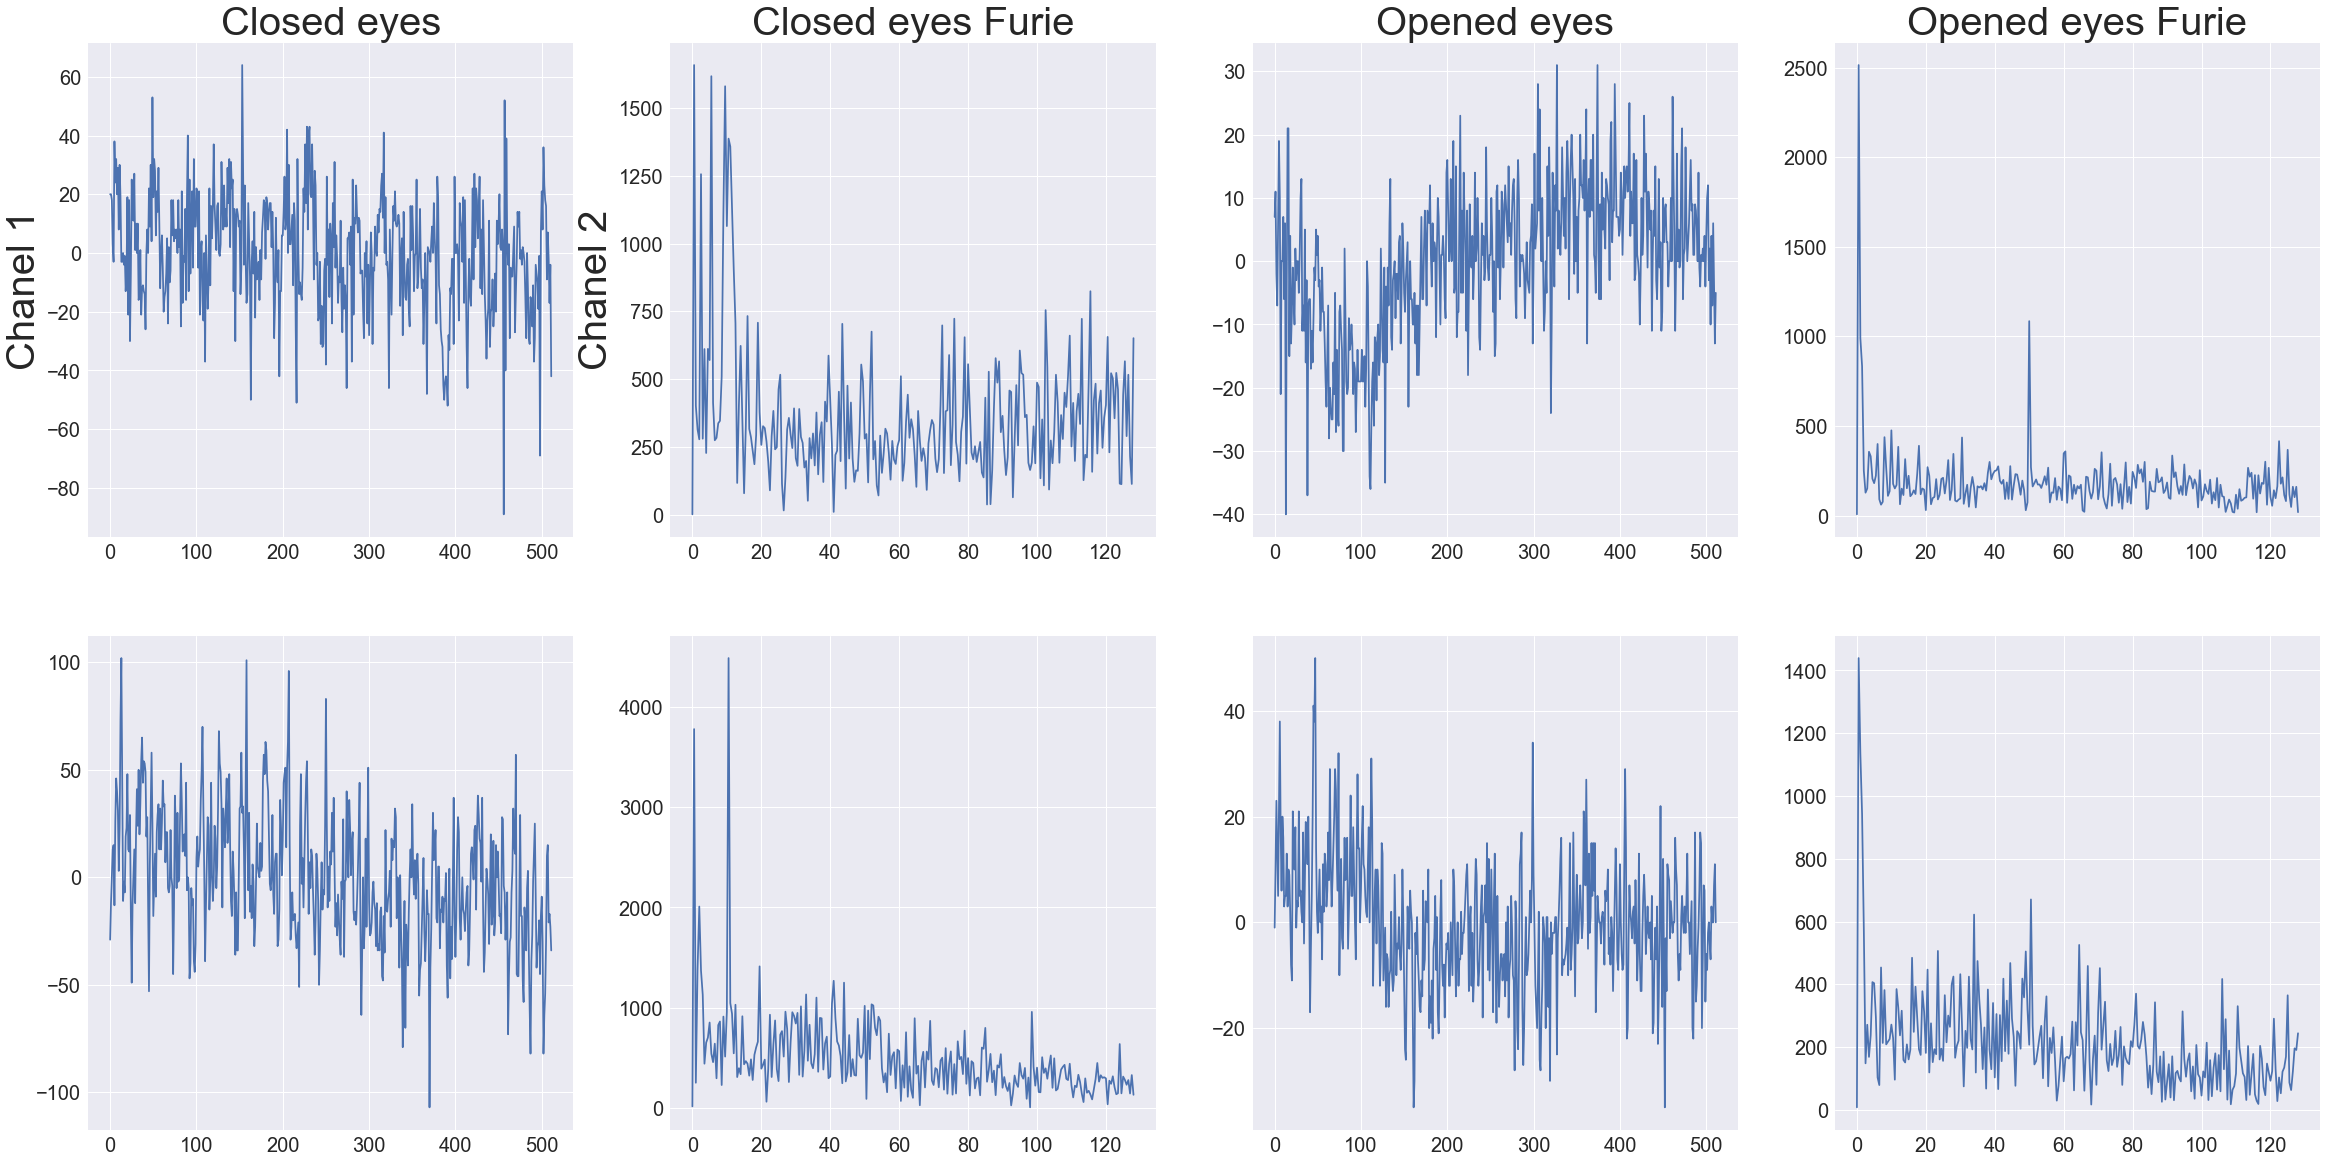

In [5]:
n = 2

fig, axes = plt.subplots(n, 4, figsize=(40, 10 * n))

for ax in axes.flatten():
    ax.tick_params(axis='both', which='major', labelsize=20)

axes[0, 0].set_title('Closed eyes', fontsize=40)
axes[0, 1].set_title('Closed eyes Furie', fontsize=40)
axes[0, 2].set_title('Opened eyes', fontsize=40)
axes[0, 3].set_title('Opened eyes Furie', fontsize=40)

for i in range(n):
    # Close
    axes[i, 0].plot(signals_close[i])
    axes[i, 1].plot(getX(signals_close[i]), getY(signals_close[i]))
    
    # Open
    axes[i, 2].plot(signals_open[i])
    axes[i, 3].plot(getX(signals_open[i]), getY(signals_open[i]))

In [9]:
def getF(sig):
    mY = getY(sig)
    mX = getX(sig)
    
    features = np.concatenate([sig, mY, mX])

    return np.concatenate([mY[:-1], sig])

x = np.array(list(map(getF, signals_close)) + list(map(getF, signals_open)))

a = np.full(50, 0)
b = np.full(49, 1)
y = np.concatenate([a, b])
y = tf.keras.utils.to_categorical(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=6)

Train on 71 samples, validate on 18 samples
Epoch 1/500
71/71 [==============================] - 0s 3ms/sample - loss: 0.6972 - acc: 0.5070 - val_loss: 0.7117 - val_acc: 0.4444
Epoch 2/500
71/71 [==============================] - 0s 140us/sample - loss: 0.6971 - acc: 0.5070 - val_loss: 0.7116 - val_acc: 0.4444
Epoch 3/500
71/71 [==============================] - 0s 140us/sample - loss: 0.6970 - acc: 0.5070 - val_loss: 0.7115 - val_acc: 0.4444
Epoch 4/500
71/71 [==============================] - 0s 126us/sample - loss: 0.6969 - acc: 0.5070 - val_loss: 0.7115 - val_acc: 0.4444
Epoch 5/500
71/71 [==============================] - 0s 140us/sample - loss: 0.6970 - acc: 0.5070 - val_loss: 0.7115 - val_acc: 0.4444
Epoch 6/500
71/71 [==============================] - 0s 140us/sample - loss: 0.6969 - acc: 0.5070 - val_loss: 0.7115 - val_acc: 0.4444
Epoch 7/500
71/71 [==============================] - 0s 140us/sample - loss: 0.6969 - acc: 0.5070 - val_loss: 0.7113 - val_acc: 0.4444
Epoch 8/500
7

Epoch 61/500
71/71 [==============================] - 0s 126us/sample - loss: 0.6950 - acc: 0.5070 - val_loss: 0.7086 - val_acc: 0.4444
Epoch 62/500
71/71 [==============================] - 0s 126us/sample - loss: 0.6950 - acc: 0.5070 - val_loss: 0.7086 - val_acc: 0.4444
Epoch 63/500
71/71 [==============================] - 0s 126us/sample - loss: 0.6949 - acc: 0.5070 - val_loss: 0.7086 - val_acc: 0.4444
Epoch 64/500
71/71 [==============================] - 0s 183us/sample - loss: 0.6950 - acc: 0.5070 - val_loss: 0.7087 - val_acc: 0.4444
Epoch 65/500
71/71 [==============================] - 0s 140us/sample - loss: 0.6950 - acc: 0.5070 - val_loss: 0.7086 - val_acc: 0.4444
Epoch 66/500
71/71 [==============================] - 0s 140us/sample - loss: 0.6949 - acc: 0.5070 - val_loss: 0.7085 - val_acc: 0.4444
Epoch 67/500
71/71 [==============================] - 0s 140us/sample - loss: 0.6949 - acc: 0.5070 - val_loss: 0.7086 - val_acc: 0.4444
Epoch 68/500
71/71 [============================

Epoch 180/500
71/71 [==============================] - 0s 140us/sample - loss: 0.6928 - acc: 0.5070 - val_loss: 0.7038 - val_acc: 0.4444
Epoch 181/500
71/71 [==============================] - 0s 140us/sample - loss: 0.6928 - acc: 0.5070 - val_loss: 0.7039 - val_acc: 0.4444
Epoch 182/500
71/71 [==============================] - 0s 140us/sample - loss: 0.6928 - acc: 0.5070 - val_loss: 0.7037 - val_acc: 0.4444
Epoch 183/500
71/71 [==============================] - 0s 126us/sample - loss: 0.6928 - acc: 0.5070 - val_loss: 0.7038 - val_acc: 0.4444
Epoch 184/500
71/71 [==============================] - 0s 126us/sample - loss: 0.6928 - acc: 0.5070 - val_loss: 0.7038 - val_acc: 0.4444
Epoch 185/500
71/71 [==============================] - 0s 140us/sample - loss: 0.6928 - acc: 0.5070 - val_loss: 0.7039 - val_acc: 0.4444
Epoch 186/500
71/71 [==============================] - 0s 197us/sample - loss: 0.6928 - acc: 0.5070 - val_loss: 0.7038 - val_acc: 0.4444
Epoch 187/500
71/71 [====================

Epoch 240/500
71/71 [==============================] - 0s 140us/sample - loss: 0.6922 - acc: 0.5070 - val_loss: 0.7022 - val_acc: 0.4444
Epoch 241/500
71/71 [==============================] - 0s 155us/sample - loss: 0.6922 - acc: 0.5070 - val_loss: 0.7023 - val_acc: 0.4444
Epoch 242/500
71/71 [==============================] - 0s 155us/sample - loss: 0.6922 - acc: 0.5070 - val_loss: 0.7024 - val_acc: 0.4444
Epoch 243/500
71/71 [==============================] - 0s 126us/sample - loss: 0.6922 - acc: 0.5070 - val_loss: 0.7023 - val_acc: 0.4444
Epoch 244/500
71/71 [==============================] - 0s 140us/sample - loss: 0.6922 - acc: 0.5070 - val_loss: 0.7024 - val_acc: 0.4444
Epoch 245/500
71/71 [==============================] - 0s 140us/sample - loss: 0.6922 - acc: 0.5070 - val_loss: 0.7023 - val_acc: 0.4444
Epoch 246/500
71/71 [==============================] - 0s 126us/sample - loss: 0.6922 - acc: 0.5070 - val_loss: 0.7022 - val_acc: 0.4444
Epoch 247/500
71/71 [====================

Epoch 300/500
71/71 [==============================] - ETA: 0s - loss: 0.6931 - acc: 0.468 - 0s 140us/sample - loss: 0.6918 - acc: 0.5070 - val_loss: 0.7014 - val_acc: 0.4444
Epoch 301/500
71/71 [==============================] - 0s 140us/sample - loss: 0.6918 - acc: 0.5070 - val_loss: 0.7013 - val_acc: 0.4444
Epoch 302/500
71/71 [==============================] - 0s 126us/sample - loss: 0.6918 - acc: 0.5070 - val_loss: 0.7014 - val_acc: 0.4444
Epoch 303/500
71/71 [==============================] - 0s 140us/sample - loss: 0.6918 - acc: 0.5070 - val_loss: 0.7014 - val_acc: 0.4444
Epoch 304/500
71/71 [==============================] - 0s 140us/sample - loss: 0.6918 - acc: 0.5070 - val_loss: 0.7014 - val_acc: 0.4444
Epoch 305/500
71/71 [==============================] - 0s 140us/sample - loss: 0.6918 - acc: 0.5070 - val_loss: 0.7013 - val_acc: 0.4444
Epoch 306/500
71/71 [==============================] - 0s 126us/sample - loss: 0.6918 - acc: 0.5070 - val_loss: 0.7012 - val_acc: 0.4444
Epo

Epoch 419/500
71/71 [==============================] - 0s 197us/sample - loss: 0.6912 - acc: 0.5070 - val_loss: 0.7000 - val_acc: 0.4444
Epoch 420/500
71/71 [==============================] - 0s 169us/sample - loss: 0.6912 - acc: 0.5070 - val_loss: 0.7000 - val_acc: 0.4444
Epoch 421/500
71/71 [==============================] - 0s 169us/sample - loss: 0.6912 - acc: 0.5070 - val_loss: 0.7000 - val_acc: 0.4444
Epoch 422/500
71/71 [==============================] - 0s 169us/sample - loss: 0.6912 - acc: 0.5070 - val_loss: 0.7000 - val_acc: 0.4444
Epoch 423/500
71/71 [==============================] - 0s 169us/sample - loss: 0.6912 - acc: 0.5070 - val_loss: 0.7000 - val_acc: 0.4444
Epoch 424/500
71/71 [==============================] - 0s 197us/sample - loss: 0.6912 - acc: 0.5070 - val_loss: 0.7000 - val_acc: 0.4444
Epoch 425/500
71/71 [==============================] - 0s 183us/sample - loss: 0.6911 - acc: 0.5070 - val_loss: 0.7000 - val_acc: 0.4444
Epoch 426/500
71/71 [====================

Epoch 38/500
71/71 [==============================] - 0s 126us/sample - loss: 0.9495 - acc: 0.4789 - val_loss: 0.7646 - val_acc: 0.6111
Epoch 39/500
71/71 [==============================] - 0s 140us/sample - loss: 0.9481 - acc: 0.4789 - val_loss: 0.7637 - val_acc: 0.6111
Epoch 40/500
71/71 [==============================] - 0s 140us/sample - loss: 0.9466 - acc: 0.4789 - val_loss: 0.7630 - val_acc: 0.6111
Epoch 41/500
71/71 [==============================] - 0s 126us/sample - loss: 0.9454 - acc: 0.4789 - val_loss: 0.7622 - val_acc: 0.6111
Epoch 42/500
71/71 [==============================] - 0s 126us/sample - loss: 0.9440 - acc: 0.4789 - val_loss: 0.7613 - val_acc: 0.6111
Epoch 43/500
71/71 [==============================] - 0s 126us/sample - loss: 0.9425 - acc: 0.4789 - val_loss: 0.7604 - val_acc: 0.6111
Epoch 44/500
71/71 [==============================] - 0s 126us/sample - loss: 0.9410 - acc: 0.4789 - val_loss: 0.7596 - val_acc: 0.6111
Epoch 45/500
71/71 [============================

Epoch 98/500
71/71 [==============================] - 0s 126us/sample - loss: 0.8729 - acc: 0.4789 - val_loss: 0.7217 - val_acc: 0.6111
Epoch 99/500
71/71 [==============================] - 0s 126us/sample - loss: 0.8716 - acc: 0.4789 - val_loss: 0.7211 - val_acc: 0.6111
Epoch 100/500
71/71 [==============================] - 0s 140us/sample - loss: 0.8706 - acc: 0.4789 - val_loss: 0.7205 - val_acc: 0.6111
Epoch 101/500
71/71 [==============================] - 0s 140us/sample - loss: 0.8695 - acc: 0.4789 - val_loss: 0.7198 - val_acc: 0.6111
Epoch 102/500
71/71 [==============================] - 0s 126us/sample - loss: 0.8681 - acc: 0.4789 - val_loss: 0.7193 - val_acc: 0.6111
Epoch 103/500
71/71 [==============================] - 0s 140us/sample - loss: 0.8671 - acc: 0.4789 - val_loss: 0.7187 - val_acc: 0.6111
Epoch 104/500
71/71 [==============================] - 0s 140us/sample - loss: 0.8659 - acc: 0.4789 - val_loss: 0.7182 - val_acc: 0.6111
Epoch 105/500
71/71 [======================

Epoch 158/500
71/71 [==============================] - 0s 169us/sample - loss: 0.8154 - acc: 0.4789 - val_loss: 0.6937 - val_acc: 0.6111
Epoch 159/500
71/71 [==============================] - 0s 140us/sample - loss: 0.8147 - acc: 0.4789 - val_loss: 0.6933 - val_acc: 0.6111
Epoch 160/500
71/71 [==============================] - 0s 183us/sample - loss: 0.8137 - acc: 0.4789 - val_loss: 0.6930 - val_acc: 0.6111
Epoch 161/500
71/71 [==============================] - 0s 169us/sample - loss: 0.8130 - acc: 0.4789 - val_loss: 0.6926 - val_acc: 0.6111
Epoch 162/500
71/71 [==============================] - 0s 126us/sample - loss: 0.8122 - acc: 0.4789 - val_loss: 0.6923 - val_acc: 0.6111
Epoch 163/500
71/71 [==============================] - 0s 126us/sample - loss: 0.8114 - acc: 0.4789 - val_loss: 0.6920 - val_acc: 0.6111
Epoch 164/500
71/71 [==============================] - 0s 140us/sample - loss: 0.8107 - acc: 0.4789 - val_loss: 0.6917 - val_acc: 0.6111
Epoch 165/500
71/71 [====================

Epoch 277/500
71/71 [==============================] - 0s 140us/sample - loss: 0.7482 - acc: 0.4789 - val_loss: 0.6705 - val_acc: 0.6111
Epoch 278/500
71/71 [==============================] - 0s 140us/sample - loss: 0.7480 - acc: 0.4789 - val_loss: 0.6704 - val_acc: 0.6111
Epoch 279/500
71/71 [==============================] - 0s 140us/sample - loss: 0.7477 - acc: 0.4789 - val_loss: 0.6703 - val_acc: 0.6111
Epoch 280/500
71/71 [==============================] - 0s 140us/sample - loss: 0.7471 - acc: 0.4789 - val_loss: 0.6703 - val_acc: 0.6111
Epoch 281/500
71/71 [==============================] - 0s 140us/sample - loss: 0.7468 - acc: 0.4789 - val_loss: 0.6702 - val_acc: 0.6111
Epoch 282/500
71/71 [==============================] - 0s 140us/sample - loss: 0.7464 - acc: 0.4789 - val_loss: 0.6701 - val_acc: 0.6111
Epoch 283/500
71/71 [==============================] - 0s 140us/sample - loss: 0.7458 - acc: 0.4789 - val_loss: 0.6700 - val_acc: 0.6111
Epoch 284/500
71/71 [====================

Epoch 337/500
71/71 [==============================] - 0s 126us/sample - loss: 0.7287 - acc: 0.4789 - val_loss: 0.6680 - val_acc: 0.6111
Epoch 338/500
71/71 [==============================] - 0s 126us/sample - loss: 0.7284 - acc: 0.4789 - val_loss: 0.6680 - val_acc: 0.6111
Epoch 339/500
71/71 [==============================] - 0s 140us/sample - loss: 0.7283 - acc: 0.4789 - val_loss: 0.6680 - val_acc: 0.6111
Epoch 340/500
71/71 [==============================] - 0s 140us/sample - loss: 0.7282 - acc: 0.4789 - val_loss: 0.6680 - val_acc: 0.6111
Epoch 341/500
71/71 [==============================] - 0s 140us/sample - loss: 0.7279 - acc: 0.4789 - val_loss: 0.6680 - val_acc: 0.6111
Epoch 342/500
71/71 [==============================] - 0s 140us/sample - loss: 0.7277 - acc: 0.4789 - val_loss: 0.6680 - val_acc: 0.6111
Epoch 343/500
71/71 [==============================] - 0s 126us/sample - loss: 0.7275 - acc: 0.4789 - val_loss: 0.6680 - val_acc: 0.6111
Epoch 344/500
71/71 [====================

Epoch 456/500
71/71 [==============================] - 0s 140us/sample - loss: 0.7077 - acc: 0.4789 - val_loss: 0.6712 - val_acc: 0.6111
Epoch 457/500
71/71 [==============================] - 0s 172us/sample - loss: 0.7076 - acc: 0.4789 - val_loss: 0.6713 - val_acc: 0.6111
Epoch 458/500
71/71 [==============================] - 0s 155us/sample - loss: 0.7075 - acc: 0.4789 - val_loss: 0.6714 - val_acc: 0.6111
Epoch 459/500
71/71 [==============================] - 0s 140us/sample - loss: 0.7073 - acc: 0.4789 - val_loss: 0.6714 - val_acc: 0.6111
Epoch 460/500
71/71 [==============================] - 0s 155us/sample - loss: 0.7071 - acc: 0.4789 - val_loss: 0.6714 - val_acc: 0.6111
Epoch 461/500
71/71 [==============================] - 0s 197us/sample - loss: 0.7071 - acc: 0.4789 - val_loss: 0.6715 - val_acc: 0.6111
Epoch 462/500
71/71 [==============================] - 0s 140us/sample - loss: 0.7070 - acc: 0.4789 - val_loss: 0.6716 - val_acc: 0.6111
Epoch 463/500
71/71 [====================

Epoch 16/500
71/71 [==============================] - 0s 127us/sample - loss: 1.5562 - acc: 0.4930 - val_loss: 1.3650 - val_acc: 0.5556
Epoch 17/500
71/71 [==============================] - 0s 126us/sample - loss: 1.5530 - acc: 0.4930 - val_loss: 1.3629 - val_acc: 0.5556
Epoch 18/500
71/71 [==============================] - 0s 126us/sample - loss: 1.5506 - acc: 0.4930 - val_loss: 1.3605 - val_acc: 0.5556
Epoch 19/500
71/71 [==============================] - 0s 140us/sample - loss: 1.5478 - acc: 0.4930 - val_loss: 1.3581 - val_acc: 0.5556
Epoch 20/500
71/71 [==============================] - 0s 136us/sample - loss: 1.5450 - acc: 0.4930 - val_loss: 1.3555 - val_acc: 0.5556
Epoch 21/500
71/71 [==============================] - 0s 126us/sample - loss: 1.5420 - acc: 0.4930 - val_loss: 1.3535 - val_acc: 0.5556
Epoch 22/500
71/71 [==============================] - 0s 155us/sample - loss: 1.5396 - acc: 0.4930 - val_loss: 1.3511 - val_acc: 0.5556
Epoch 23/500
71/71 [============================

71/71 [==============================] - 0s 126us/sample - loss: 1.2588 - acc: 0.4930 - val_loss: 1.1114 - val_acc: 0.5556
Epoch 137/500
71/71 [==============================] - 0s 140us/sample - loss: 1.2563 - acc: 0.4930 - val_loss: 1.1092 - val_acc: 0.5556
Epoch 138/500
71/71 [==============================] - 0s 140us/sample - loss: 1.2538 - acc: 0.4930 - val_loss: 1.1076 - val_acc: 0.5556
Epoch 139/500
71/71 [==============================] - 0s 126us/sample - loss: 1.2519 - acc: 0.4930 - val_loss: 1.1058 - val_acc: 0.5556
Epoch 140/500
71/71 [==============================] - 0s 126us/sample - loss: 1.2498 - acc: 0.4930 - val_loss: 1.1041 - val_acc: 0.5556
Epoch 141/500
71/71 [==============================] - 0s 126us/sample - loss: 1.2477 - acc: 0.4930 - val_loss: 1.1020 - val_acc: 0.5556
Epoch 142/500
71/71 [==============================] - 0s 126us/sample - loss: 1.2453 - acc: 0.4930 - val_loss: 1.1001 - val_acc: 0.5556
Epoch 143/500
71/71 [==============================] - 

Epoch 196/500
71/71 [==============================] - 0s 126us/sample - loss: 1.1361 - acc: 0.4930 - val_loss: 1.0082 - val_acc: 0.5556
Epoch 197/500
71/71 [==============================] - 0s 126us/sample - loss: 1.1339 - acc: 0.4930 - val_loss: 1.0069 - val_acc: 0.5556
Epoch 198/500
71/71 [==============================] - 0s 126us/sample - loss: 1.1323 - acc: 0.4930 - val_loss: 1.0054 - val_acc: 0.5556
Epoch 199/500
71/71 [==============================] - 0s 140us/sample - loss: 1.1305 - acc: 0.4930 - val_loss: 1.0038 - val_acc: 0.5556
Epoch 200/500
71/71 [==============================] - 0s 112us/sample - loss: 1.1286 - acc: 0.4930 - val_loss: 1.0023 - val_acc: 0.5556
Epoch 201/500
71/71 [==============================] - 0s 126us/sample - loss: 1.1268 - acc: 0.4930 - val_loss: 1.0006 - val_acc: 0.5556
Epoch 202/500
71/71 [==============================] - 0s 126us/sample - loss: 1.1247 - acc: 0.4930 - val_loss: 0.9993 - val_acc: 0.5556
Epoch 203/500
71/71 [====================

Epoch 256/500
71/71 [==============================] - 0s 126us/sample - loss: 1.0347 - acc: 0.4930 - val_loss: 0.9249 - val_acc: 0.5556
Epoch 257/500
71/71 [==============================] - 0s 126us/sample - loss: 1.0334 - acc: 0.4930 - val_loss: 0.9241 - val_acc: 0.5556
Epoch 258/500
71/71 [==============================] - 0s 112us/sample - loss: 1.0323 - acc: 0.4930 - val_loss: 0.9229 - val_acc: 0.5556
Epoch 259/500
71/71 [==============================] - 0s 126us/sample - loss: 1.0308 - acc: 0.4930 - val_loss: 0.9214 - val_acc: 0.5556
Epoch 260/500
71/71 [==============================] - 0s 112us/sample - loss: 1.0291 - acc: 0.4930 - val_loss: 0.9206 - val_acc: 0.5556
Epoch 261/500
71/71 [==============================] - 0s 112us/sample - loss: 1.0281 - acc: 0.4930 - val_loss: 0.9194 - val_acc: 0.5556
Epoch 262/500
71/71 [==============================] - 0s 140us/sample - loss: 1.0267 - acc: 0.4930 - val_loss: 0.9182 - val_acc: 0.5556
Epoch 263/500
71/71 [====================

Epoch 316/500
71/71 [==============================] - 0s 126us/sample - loss: 0.9506 - acc: 0.4930 - val_loss: 0.8567 - val_acc: 0.5556
Epoch 317/500
71/71 [==============================] - 0s 126us/sample - loss: 0.9493 - acc: 0.4930 - val_loss: 0.8558 - val_acc: 0.5556
Epoch 318/500
71/71 [==============================] - 0s 126us/sample - loss: 0.9481 - acc: 0.4930 - val_loss: 0.8546 - val_acc: 0.5556
Epoch 319/500
71/71 [==============================] - 0s 126us/sample - loss: 0.9466 - acc: 0.4930 - val_loss: 0.8536 - val_acc: 0.5556
Epoch 320/500
71/71 [==============================] - 0s 140us/sample - loss: 0.9455 - acc: 0.4930 - val_loss: 0.8528 - val_acc: 0.5556
Epoch 321/500
71/71 [==============================] - 0s 126us/sample - loss: 0.9444 - acc: 0.4930 - val_loss: 0.8518 - val_acc: 0.5556
Epoch 322/500
71/71 [==============================] - 0s 112us/sample - loss: 0.9431 - acc: 0.4930 - val_loss: 0.8506 - val_acc: 0.5556
Epoch 323/500
71/71 [====================

Epoch 435/500
71/71 [==============================] - 0s 140us/sample - loss: 0.8317 - acc: 0.4930 - val_loss: 0.7646 - val_acc: 0.5556
Epoch 436/500
71/71 [==============================] - 0s 126us/sample - loss: 0.8307 - acc: 0.4930 - val_loss: 0.7639 - val_acc: 0.5556
Epoch 437/500
71/71 [==============================] - 0s 140us/sample - loss: 0.8298 - acc: 0.4930 - val_loss: 0.7632 - val_acc: 0.5556
Epoch 438/500
71/71 [==============================] - 0s 126us/sample - loss: 0.8289 - acc: 0.4930 - val_loss: 0.7624 - val_acc: 0.5556
Epoch 439/500
71/71 [==============================] - 0s 140us/sample - loss: 0.8279 - acc: 0.4930 - val_loss: 0.7619 - val_acc: 0.5556
Epoch 440/500
71/71 [==============================] - 0s 126us/sample - loss: 0.8270 - acc: 0.4930 - val_loss: 0.7611 - val_acc: 0.5556
Epoch 441/500
71/71 [==============================] - 0s 112us/sample - loss: 0.8260 - acc: 0.4930 - val_loss: 0.7604 - val_acc: 0.5556
Epoch 442/500
71/71 [====================

Epoch 495/500
71/71 [==============================] - 0s 112us/sample - loss: 0.7897 - acc: 0.4930 - val_loss: 0.7346 - val_acc: 0.5556
Epoch 496/500
71/71 [==============================] - 0s 126us/sample - loss: 0.7892 - acc: 0.4930 - val_loss: 0.7341 - val_acc: 0.5556
Epoch 497/500
71/71 [==============================] - ETA: 0s - loss: 0.7828 - acc: 0.500 - 0s 126us/sample - loss: 0.7886 - acc: 0.4930 - val_loss: 0.7337 - val_acc: 0.5556
Epoch 498/500
71/71 [==============================] - 0s 126us/sample - loss: 0.7880 - acc: 0.4930 - val_loss: 0.7335 - val_acc: 0.5556
Epoch 499/500
71/71 [==============================] - 0s 126us/sample - loss: 0.7877 - acc: 0.4930 - val_loss: 0.7330 - val_acc: 0.5556
Epoch 500/500
71/71 [==============================] - 0s 112us/sample - loss: 0.7871 - acc: 0.4930 - val_loss: 0.7326 - val_acc: 0.5556
Train on 71 samples, validate on 18 samples
Epoch 1/500
71/71 [==============================] - 0s 2ms/sample - loss: 0.7797 - acc: 0.5352 

Epoch 55/500
71/71 [==============================] - 0s 126us/sample - loss: 0.7547 - acc: 0.5352 - val_loss: 0.8821 - val_acc: 0.3889
Epoch 56/500
71/71 [==============================] - 0s 126us/sample - loss: 0.7543 - acc: 0.5352 - val_loss: 0.8816 - val_acc: 0.3889
Epoch 57/500
71/71 [==============================] - 0s 140us/sample - loss: 0.7540 - acc: 0.5352 - val_loss: 0.8811 - val_acc: 0.3889
Epoch 58/500
71/71 [==============================] - 0s 140us/sample - loss: 0.7537 - acc: 0.5352 - val_loss: 0.8803 - val_acc: 0.3889
Epoch 59/500
71/71 [==============================] - 0s 126us/sample - loss: 0.7532 - acc: 0.5352 - val_loss: 0.8796 - val_acc: 0.3889
Epoch 60/500
71/71 [==============================] - 0s 126us/sample - loss: 0.7528 - acc: 0.5352 - val_loss: 0.8787 - val_acc: 0.3889
Epoch 61/500
71/71 [==============================] - 0s 140us/sample - loss: 0.7524 - acc: 0.5352 - val_loss: 0.8784 - val_acc: 0.3889
Epoch 62/500
71/71 [============================

Epoch 175/500
71/71 [==============================] - 0s 126us/sample - loss: 0.7195 - acc: 0.5352 - val_loss: 0.8129 - val_acc: 0.3889
Epoch 176/500
71/71 [==============================] - 0s 126us/sample - loss: 0.7192 - acc: 0.5352 - val_loss: 0.8125 - val_acc: 0.3889
Epoch 177/500
71/71 [==============================] - 0s 126us/sample - loss: 0.7190 - acc: 0.5352 - val_loss: 0.8118 - val_acc: 0.3889
Epoch 178/500
71/71 [==============================] - 0s 126us/sample - loss: 0.7187 - acc: 0.5352 - val_loss: 0.8112 - val_acc: 0.3889
Epoch 179/500
71/71 [==============================] - 0s 140us/sample - loss: 0.7184 - acc: 0.5352 - val_loss: 0.8108 - val_acc: 0.3889
Epoch 180/500
71/71 [==============================] - 0s 126us/sample - loss: 0.7182 - acc: 0.5352 - val_loss: 0.8103 - val_acc: 0.3889
Epoch 181/500
71/71 [==============================] - 0s 126us/sample - loss: 0.7180 - acc: 0.5352 - val_loss: 0.8098 - val_acc: 0.3889
Epoch 182/500
71/71 [====================

Epoch 235/500
71/71 [==============================] - 0s 126us/sample - loss: 0.7097 - acc: 0.5352 - val_loss: 0.7911 - val_acc: 0.3889
Epoch 236/500
71/71 [==============================] - 0s 126us/sample - loss: 0.7095 - acc: 0.5352 - val_loss: 0.7905 - val_acc: 0.3889
Epoch 237/500
71/71 [==============================] - 0s 141us/sample - loss: 0.7093 - acc: 0.5352 - val_loss: 0.7900 - val_acc: 0.3889
Epoch 238/500
71/71 [==============================] - 0s 140us/sample - loss: 0.7091 - acc: 0.5352 - val_loss: 0.7897 - val_acc: 0.3889
Epoch 239/500
71/71 [==============================] - 0s 127us/sample - loss: 0.7090 - acc: 0.5352 - val_loss: 0.7894 - val_acc: 0.3889
Epoch 240/500
71/71 [==============================] - 0s 155us/sample - loss: 0.7088 - acc: 0.5352 - val_loss: 0.7891 - val_acc: 0.3889
Epoch 241/500
71/71 [==============================] - 0s 126us/sample - loss: 0.7087 - acc: 0.5352 - val_loss: 0.7884 - val_acc: 0.3889
Epoch 242/500
71/71 [====================

Epoch 354/500
71/71 [==============================] - 0s 140us/sample - loss: 0.6975 - acc: 0.5352 - val_loss: 0.7584 - val_acc: 0.3889
Epoch 355/500
71/71 [==============================] - 0s 126us/sample - loss: 0.6975 - acc: 0.5352 - val_loss: 0.7581 - val_acc: 0.3889
Epoch 356/500
71/71 [==============================] - 0s 126us/sample - loss: 0.6973 - acc: 0.5352 - val_loss: 0.7578 - val_acc: 0.3889
Epoch 357/500
71/71 [==============================] - 0s 126us/sample - loss: 0.6973 - acc: 0.5352 - val_loss: 0.7579 - val_acc: 0.3889
Epoch 358/500
71/71 [==============================] - 0s 126us/sample - loss: 0.6973 - acc: 0.5352 - val_loss: 0.7578 - val_acc: 0.3889
Epoch 359/500
71/71 [==============================] - 0s 126us/sample - loss: 0.6973 - acc: 0.5352 - val_loss: 0.7577 - val_acc: 0.3889
Epoch 360/500
71/71 [==============================] - 0s 126us/sample - loss: 0.6972 - acc: 0.5352 - val_loss: 0.7575 - val_acc: 0.3889
Epoch 361/500
71/71 [====================

Epoch 414/500
71/71 [==============================] - 0s 112us/sample - loss: 0.6948 - acc: 0.5352 - val_loss: 0.7498 - val_acc: 0.3889
Epoch 415/500
71/71 [==============================] - 0s 126us/sample - loss: 0.6948 - acc: 0.5352 - val_loss: 0.7496 - val_acc: 0.3889
Epoch 416/500
71/71 [==============================] - 0s 126us/sample - loss: 0.6948 - acc: 0.5352 - val_loss: 0.7494 - val_acc: 0.3889
Epoch 417/500
71/71 [==============================] - 0s 126us/sample - loss: 0.6947 - acc: 0.5352 - val_loss: 0.7492 - val_acc: 0.3889
Epoch 418/500
71/71 [==============================] - 0s 140us/sample - loss: 0.6946 - acc: 0.5352 - val_loss: 0.7490 - val_acc: 0.3889
Epoch 419/500
71/71 [==============================] - 0s 126us/sample - loss: 0.6946 - acc: 0.5352 - val_loss: 0.7488 - val_acc: 0.3889
Epoch 420/500
71/71 [==============================] - 0s 126us/sample - loss: 0.6945 - acc: 0.5352 - val_loss: 0.7485 - val_acc: 0.3889
Epoch 421/500
71/71 [====================

Epoch 474/500
71/71 [==============================] - 0s 126us/sample - loss: 0.6928 - acc: 0.5352 - val_loss: 0.7423 - val_acc: 0.3889
Epoch 475/500
71/71 [==============================] - ETA: 0s - loss: 0.7146 - acc: 0.468 - 0s 126us/sample - loss: 0.6928 - acc: 0.5352 - val_loss: 0.7421 - val_acc: 0.3889
Epoch 476/500
71/71 [==============================] - 0s 126us/sample - loss: 0.6927 - acc: 0.5352 - val_loss: 0.7418 - val_acc: 0.3889
Epoch 477/500
71/71 [==============================] - 0s 126us/sample - loss: 0.6927 - acc: 0.5352 - val_loss: 0.7417 - val_acc: 0.3889
Epoch 478/500
71/71 [==============================] - 0s 126us/sample - loss: 0.6926 - acc: 0.5352 - val_loss: 0.7416 - val_acc: 0.3889
Epoch 479/500
71/71 [==============================] - 0s 126us/sample - loss: 0.6926 - acc: 0.5352 - val_loss: 0.7414 - val_acc: 0.3889
Epoch 480/500
71/71 [==============================] - 0s 126us/sample - loss: 0.6926 - acc: 0.5352 - val_loss: 0.7413 - val_acc: 0.3889
Epo

72/72 [==============================] - 0s 125us/sample - loss: 0.7226 - acc: 0.4722 - val_loss: 0.6784 - val_acc: 0.5882
Epoch 94/500
72/72 [==============================] - 0s 111us/sample - loss: 0.7223 - acc: 0.4722 - val_loss: 0.6784 - val_acc: 0.5882
Epoch 95/500
72/72 [==============================] - 0s 125us/sample - loss: 0.7221 - acc: 0.4722 - val_loss: 0.6784 - val_acc: 0.5882
Epoch 96/500
72/72 [==============================] - ETA: 0s - loss: 0.6625 - acc: 0.625 - 0s 125us/sample - loss: 0.7220 - acc: 0.4722 - val_loss: 0.6784 - val_acc: 0.5882
Epoch 97/500
72/72 [==============================] - 0s 125us/sample - loss: 0.7219 - acc: 0.4722 - val_loss: 0.6784 - val_acc: 0.5882
Epoch 98/500
72/72 [==============================] - 0s 125us/sample - loss: 0.7218 - acc: 0.4722 - val_loss: 0.6784 - val_acc: 0.5882
Epoch 99/500
72/72 [==============================] - 0s 139us/sample - loss: 0.7215 - acc: 0.4722 - val_loss: 0.6783 - val_acc: 0.5882
Epoch 100/500
72/72 [==

Epoch 153/500
72/72 [==============================] - 0s 139us/sample - loss: 0.7114 - acc: 0.4722 - val_loss: 0.6788 - val_acc: 0.5882
Epoch 154/500
72/72 [==============================] - 0s 125us/sample - loss: 0.7111 - acc: 0.4722 - val_loss: 0.6788 - val_acc: 0.5882
Epoch 155/500
72/72 [==============================] - 0s 139us/sample - loss: 0.7111 - acc: 0.4722 - val_loss: 0.6788 - val_acc: 0.5882
Epoch 156/500
72/72 [==============================] - 0s 139us/sample - loss: 0.7109 - acc: 0.4722 - val_loss: 0.6789 - val_acc: 0.5882
Epoch 157/500
72/72 [==============================] - 0s 125us/sample - loss: 0.7107 - acc: 0.4722 - val_loss: 0.6789 - val_acc: 0.5882
Epoch 158/500
72/72 [==============================] - 0s 111us/sample - loss: 0.7106 - acc: 0.4722 - val_loss: 0.6789 - val_acc: 0.5882
Epoch 159/500
72/72 [==============================] - 0s 125us/sample - loss: 0.7105 - acc: 0.4722 - val_loss: 0.6789 - val_acc: 0.5882
Epoch 160/500
72/72 [====================

Epoch 272/500
72/72 [==============================] - 0s 125us/sample - loss: 0.6985 - acc: 0.4722 - val_loss: 0.6839 - val_acc: 0.5882
Epoch 273/500
72/72 [==============================] - 0s 139us/sample - loss: 0.6985 - acc: 0.4722 - val_loss: 0.6840 - val_acc: 0.5882
Epoch 274/500
72/72 [==============================] - 0s 125us/sample - loss: 0.6984 - acc: 0.4722 - val_loss: 0.6841 - val_acc: 0.5882
Epoch 275/500
72/72 [==============================] - 0s 152us/sample - loss: 0.6983 - acc: 0.4722 - val_loss: 0.6841 - val_acc: 0.5882
Epoch 276/500
72/72 [==============================] - 0s 139us/sample - loss: 0.6983 - acc: 0.4722 - val_loss: 0.6841 - val_acc: 0.5882
Epoch 277/500
72/72 [==============================] - 0s 139us/sample - loss: 0.6982 - acc: 0.4722 - val_loss: 0.6841 - val_acc: 0.5882
Epoch 278/500
72/72 [==============================] - 0s 125us/sample - loss: 0.6982 - acc: 0.4722 - val_loss: 0.6842 - val_acc: 0.5882
Epoch 279/500
72/72 [====================

Epoch 332/500
72/72 [==============================] - 0s 125us/sample - loss: 0.6953 - acc: 0.4722 - val_loss: 0.6872 - val_acc: 0.5882
Epoch 333/500
72/72 [==============================] - 0s 125us/sample - loss: 0.6953 - acc: 0.4722 - val_loss: 0.6873 - val_acc: 0.5882
Epoch 334/500
72/72 [==============================] - 0s 125us/sample - loss: 0.6952 - acc: 0.4722 - val_loss: 0.6874 - val_acc: 0.5882
Epoch 335/500
72/72 [==============================] - 0s 125us/sample - loss: 0.6951 - acc: 0.4722 - val_loss: 0.6873 - val_acc: 0.5882
Epoch 336/500
72/72 [==============================] - 0s 111us/sample - loss: 0.6951 - acc: 0.4722 - val_loss: 0.6873 - val_acc: 0.5882
Epoch 337/500
72/72 [==============================] - 0s 125us/sample - loss: 0.6951 - acc: 0.4722 - val_loss: 0.6875 - val_acc: 0.5882
Epoch 338/500
72/72 [==============================] - 0s 139us/sample - loss: 0.6951 - acc: 0.4722 - val_loss: 0.6876 - val_acc: 0.5882
Epoch 339/500
72/72 [====================

72/72 [==============================] - 0s 127us/sample - loss: 0.6920 - acc: 0.5556 - val_loss: 0.6927 - val_acc: 0.5294
Epoch 451/500
72/72 [==============================] - 0s 125us/sample - loss: 0.6920 - acc: 0.5556 - val_loss: 0.6927 - val_acc: 0.5294
Epoch 452/500
72/72 [==============================] - 0s 111us/sample - loss: 0.6920 - acc: 0.5556 - val_loss: 0.6928 - val_acc: 0.5294
Epoch 453/500
72/72 [==============================] - 0s 139us/sample - loss: 0.6920 - acc: 0.5556 - val_loss: 0.6929 - val_acc: 0.5294
Epoch 454/500
72/72 [==============================] - 0s 111us/sample - loss: 0.6920 - acc: 0.5694 - val_loss: 0.6929 - val_acc: 0.4706
Epoch 455/500
72/72 [==============================] - 0s 125us/sample - loss: 0.6919 - acc: 0.5694 - val_loss: 0.6931 - val_acc: 0.4706
Epoch 456/500
72/72 [==============================] - 0s 125us/sample - loss: 0.6919 - acc: 0.5694 - val_loss: 0.6930 - val_acc: 0.4706
Epoch 457/500
72/72 [==============================] - 

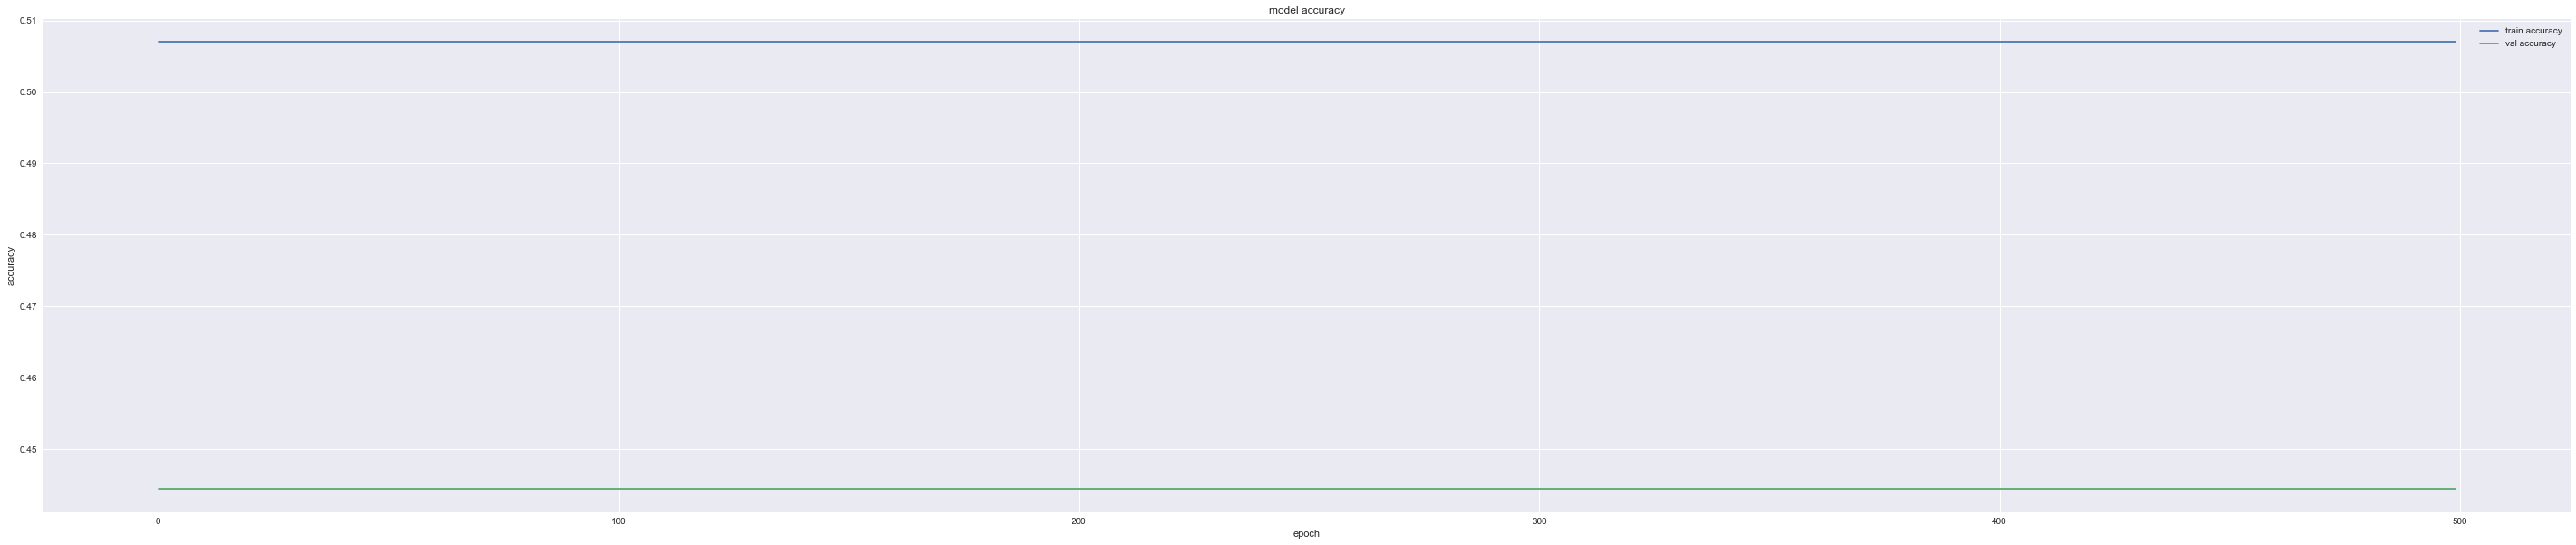

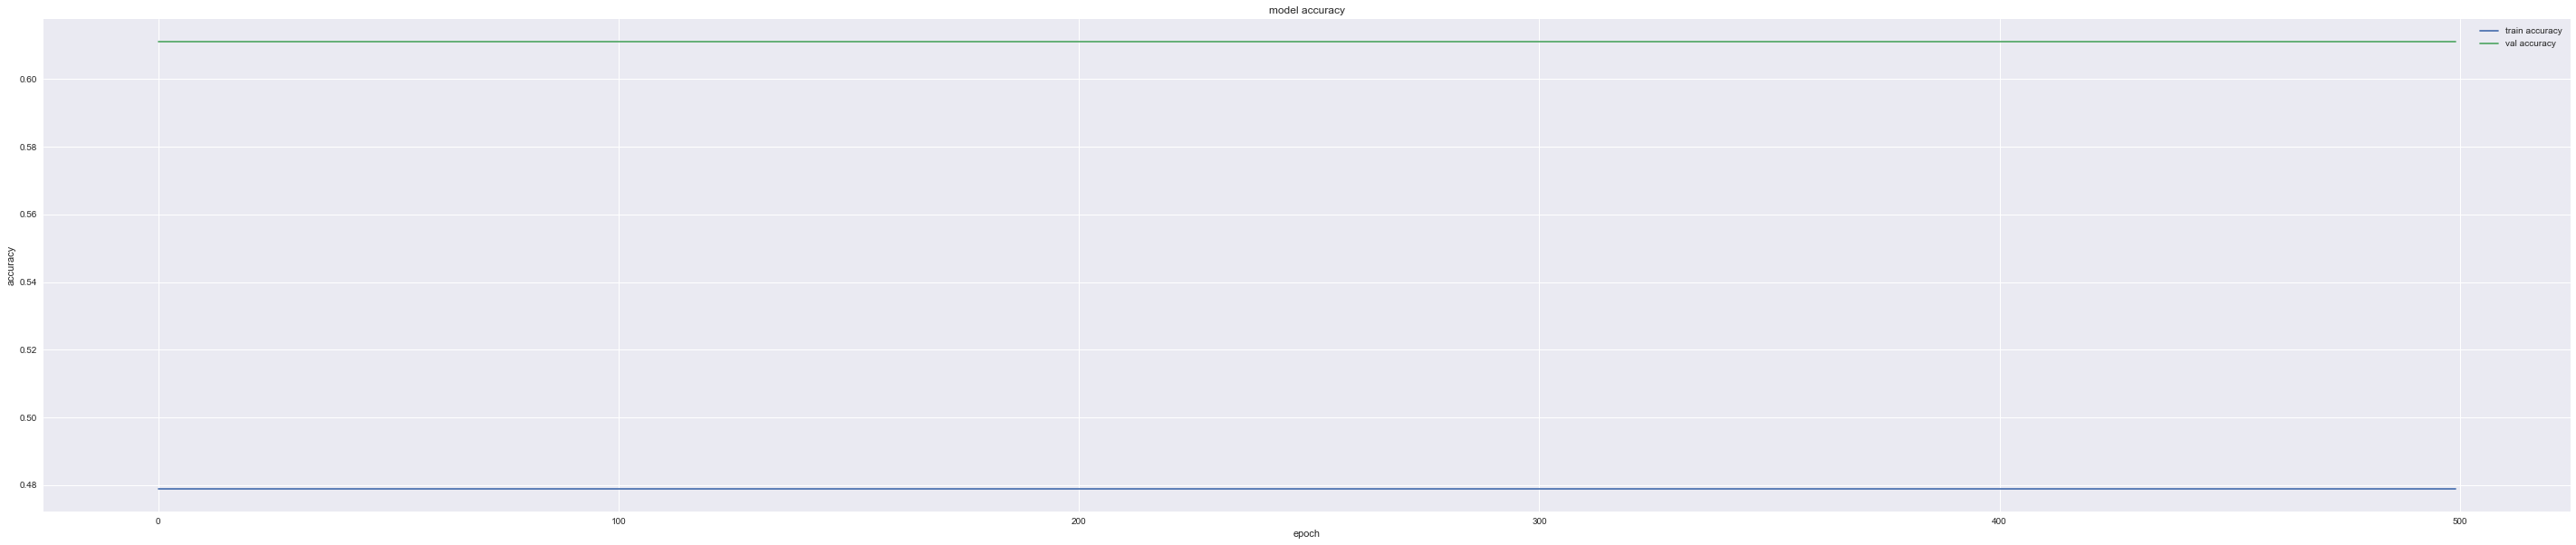

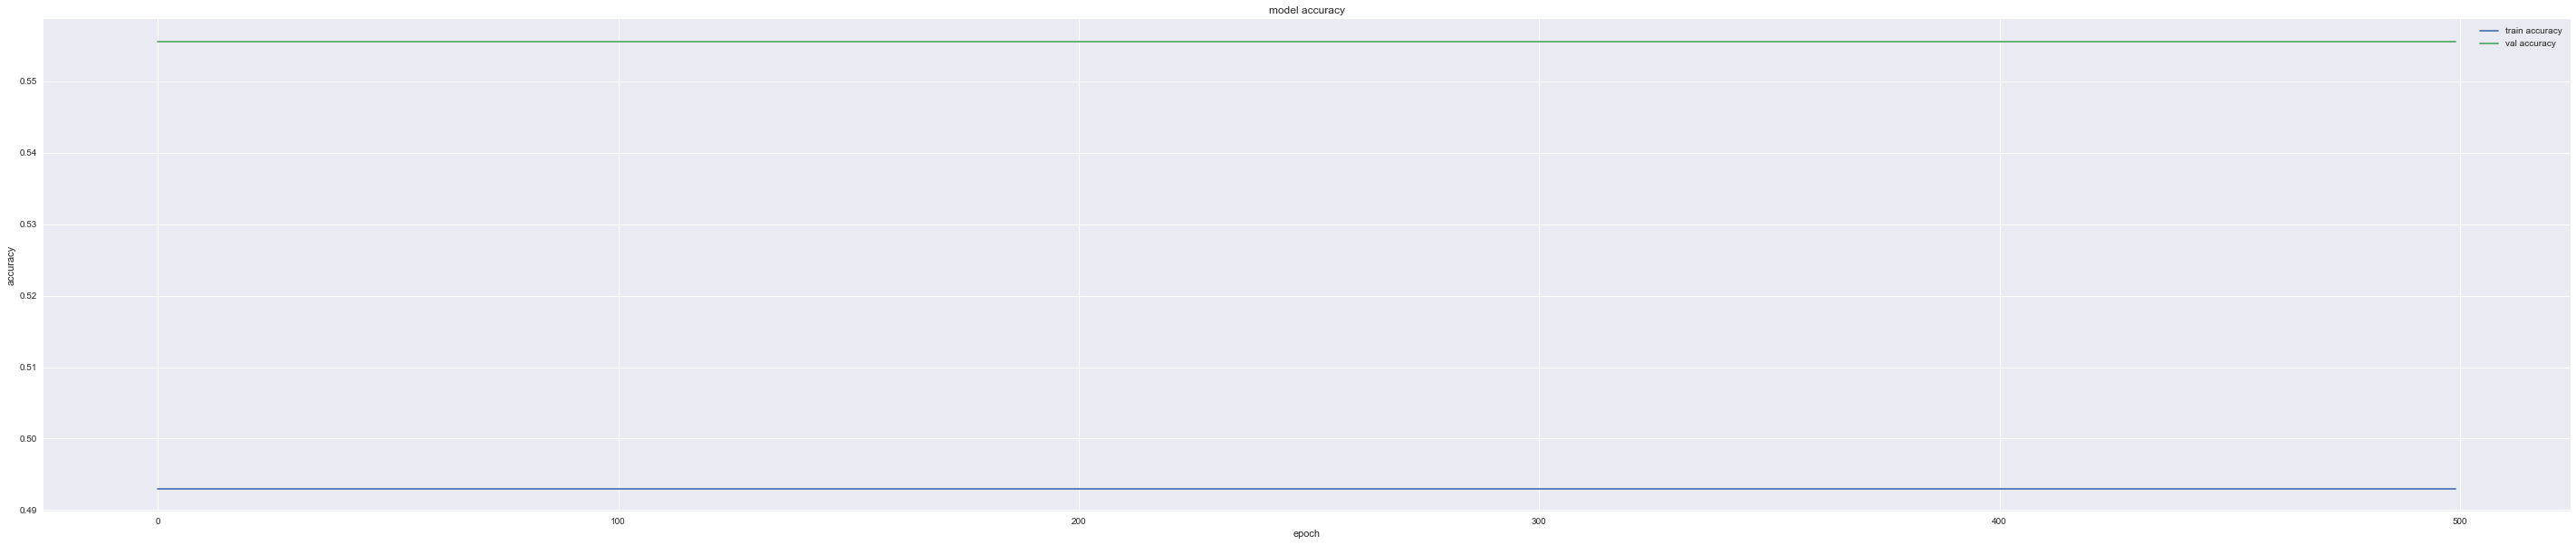

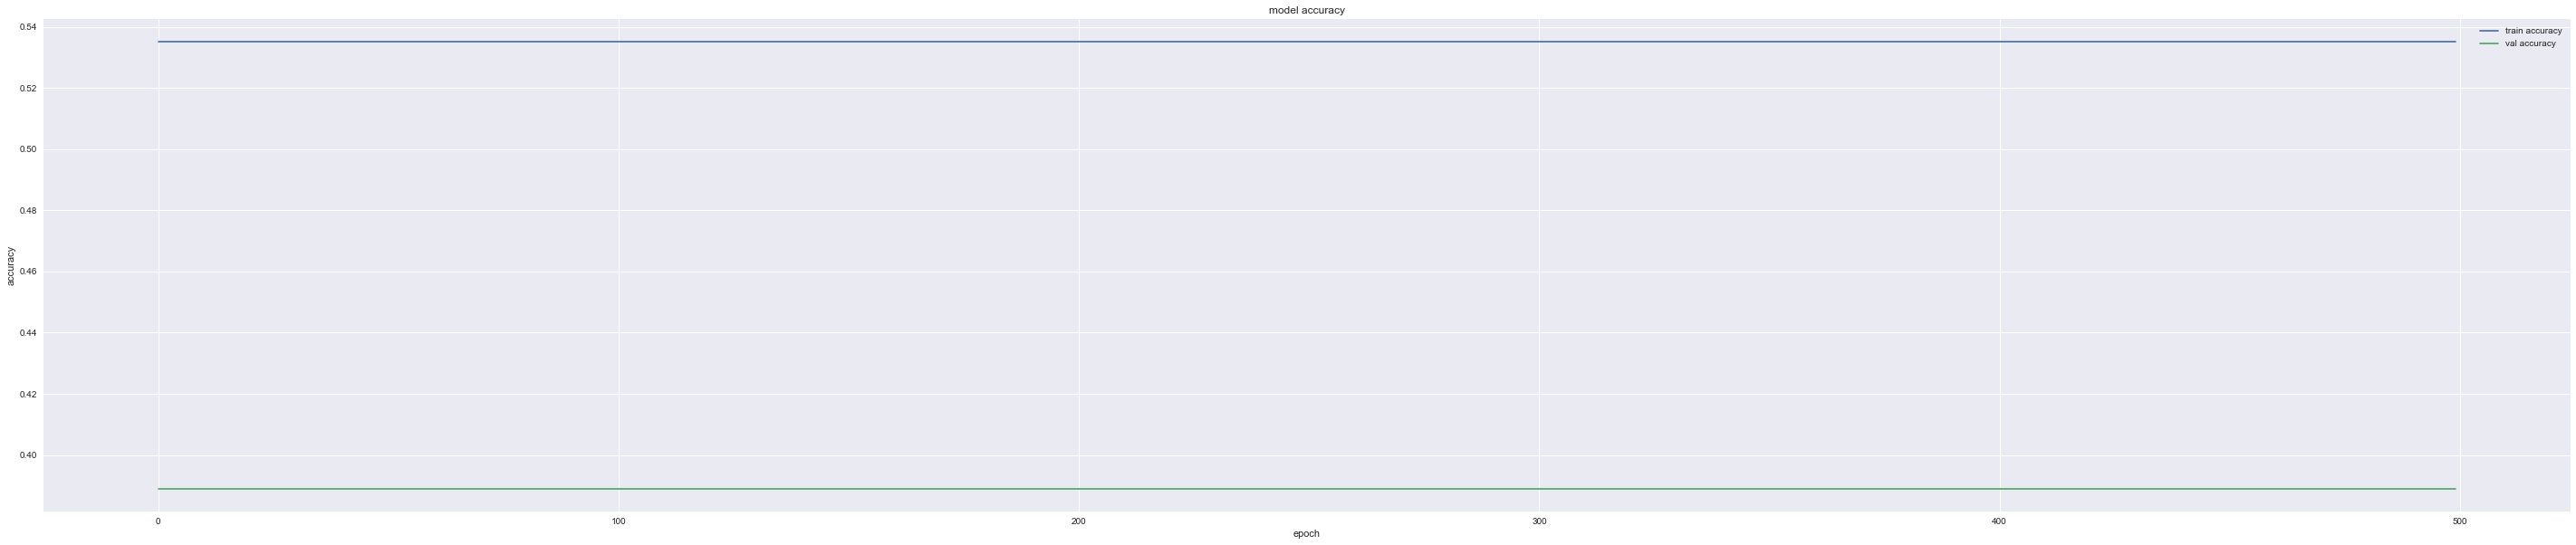

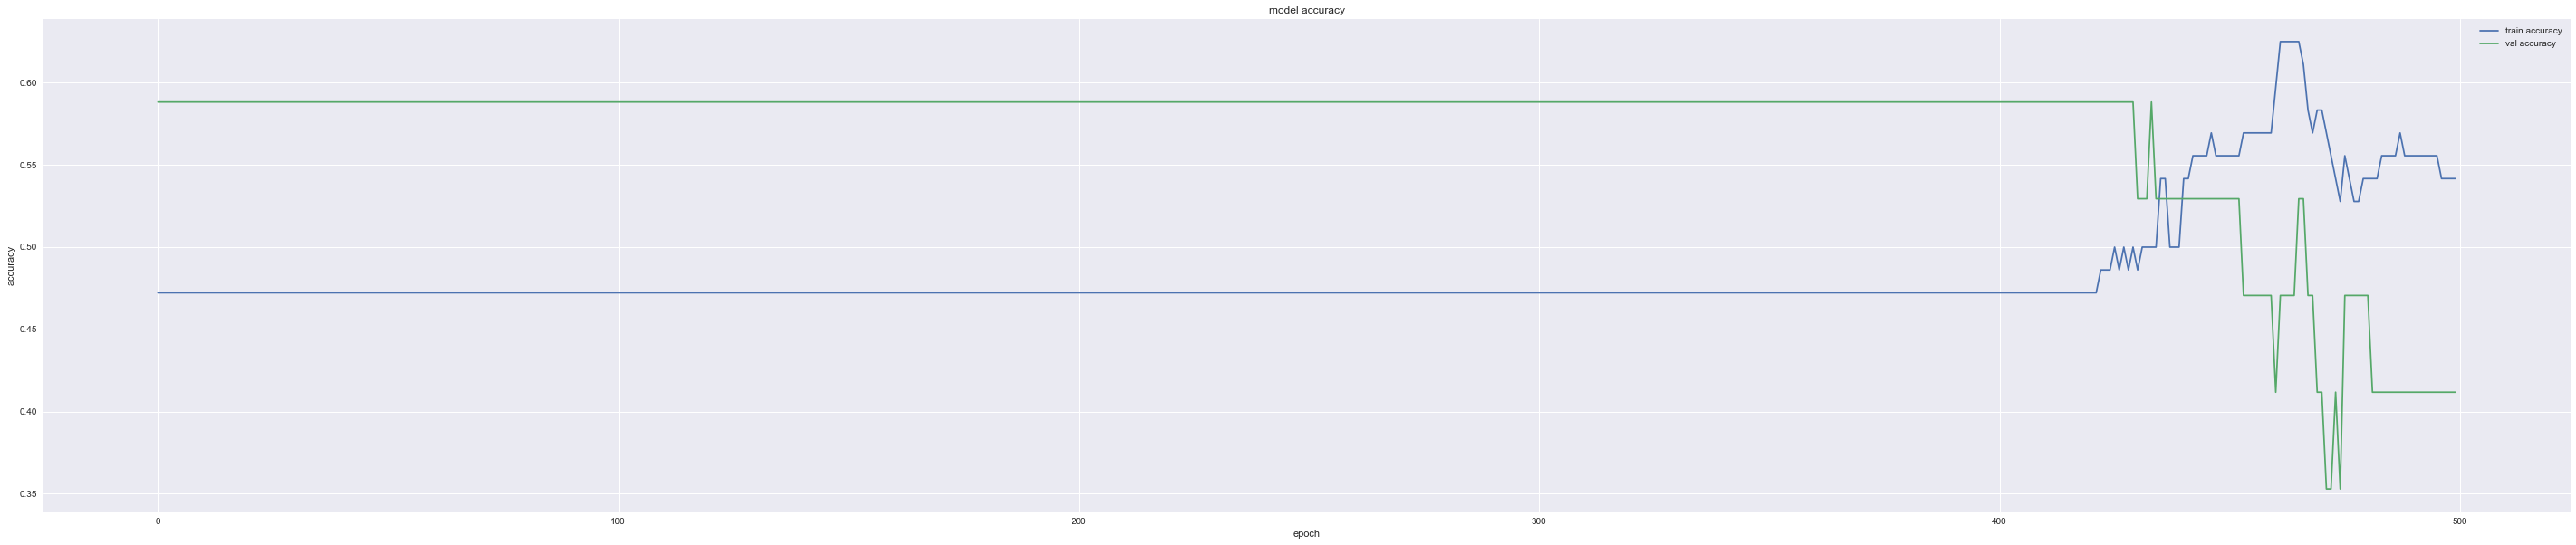

In [22]:
INIT_LR = 0.0001
EPOCHS = 500
BATCH_SIZE = 1
split = 5

def buildmodel():
    model = Sequential()
    model.add(Dense(512, input_shape=(768,), activation="sigmoid"))
    model.add(Dense(256, activation="sigmoid"))
    model.add(Dense(128, activation="sigmoid"))
    model.add(Dense(64, activation="sigmoid"))
    model.add(Dense(2, activation="softmax"))
    model.compile(loss="binary_crossentropy", optimizer=SGD(lr=INIT_LR), metrics=["accuracy"])
    
    return model

def get_model_name():
    return r'model_{val_acc:.2f}.h5'
def get_best_name():
    return 'model_best.h5'

kf = KFold(n_splits = split, random_state = 100, shuffle = True)
skf = StratifiedKFold(n_splits = split, random_state = 100, shuffle = True) 

myHistoris = []

save_dir = r"C:\Users\Admin\PycharmProjects\Kognitive NTI\Module 1\Task 3\saved_models\\"

for train_i, test_i in kf.split(x, y):
    
    train_x, train_y, test_x, test_y = x[train_i], y[train_i], x[test_i], y[test_i]

    model = buildmodel()
    checkpointer = ModelCheckpoint(save_dir + get_model_name(), monitor='val_acc', verbose=0, 
                                 save_best_only=True, mode='max')
    checkpoint = ModelCheckpoint(save_dir + get_best_name(), monitor='val_acc', verbose=0, 
                                 save_best_only=True, mode='max')

    H = model.fit(train_x, train_y, validation_data=(test_x, test_y), 
                        epochs=EPOCHS, 
                        callbacks=[checkpoint, checkpointer])

    myHistoris.append(H.history)
    genH = H.history
    
    _, ax = plt.subplots(figsize=(50, 10))
    ax.plot(genH['acc'], label='train accuracy')
    ax.plot(genH['val_acc'], label='val accuracy')
    ax.set_title('model accuracy')
    ax.set_ylabel('accuracy')
    ax.set_xlabel('epoch')
    ax.legend()
    
    clear_session()

# # summarize history for loss
# plt.plot(h['loss'])
# plt.plot(h['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
model = load_model(r'C:\Users\Admin\PycharmProjects\Kognitive NTI\Module 1\Task 3\saved_models\model_best.h5')
print('\n\n\n\n\n')
print("Secret accuracy", model.evaluate(secret_x, secret_y))

In [9]:
model = keras.models.load_model(r'C:\Users\Admin\PycharmProjects\Kognitive NTI\Module 1\Task 3\saved_models\model_0.95.h5')

data = []
file = open("my_sig.txt")

for sig in file.read().split('\n\n'):
    arr = np.array(sig.split(), dtype='int16')
    data.append(arr)

data = np.array(list(map(getF, data)))

pred = model.predict(data)
pred = np.array(list(map(lambda p: 1 if p[0] > p[1] else 2, pred)))
file.close()
print(' '.join(list(map(str, pred))))

2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 2 2 1 2 1 2 2 2 1 1 2 2 2 1 2 2 2 2 2 1 2 1 2 1 1 1 2 1 2 1 2 2 1 1 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 1 2 2 2 1 2 1 2 2 2 2 1 1 2 1 2 2 2 1 2 2 2
